In [1]:
import pandas as pd

from settings import key
from datetime import datetime


In [2]:
coords = []

with open("server.log", "r") as f:
    while line := f.readline():
        if '/api/v1/forecast/cities?lat=' in line:
            coords.append([
                str(float(line.split("=")[1].split("&")[0])), # lat
                str(float(line.split("=")[2].split("&")[0].split(" ")[0])), # lon
                datetime.strptime(line.split(",")[0][1:], '%Y-%m-%d %H:%M:%S'), # time
            ])


In [3]:
df = pd.DataFrame(coords)


In [4]:
df

,0,1,2
0,56.99167,24.30306,2024-10-30 21:22:50
1,56.99167,24.30306,2024-10-30 21:22:53
2,56.99167,24.30306,2024-10-30 21:22:54
3,56.99167,24.30306,2024-10-30 21:22:55
4,56.99167,24.30306,2024-10-30 21:22:55
...,...,...,...
24288,56.9549560546875,24.18711280822754,2024-11-15 16:30:22
24289,56.9549560546875,24.18711280822754,2024-11-15 16:30:22
24290,56.9549560546875,24.18711280822754,2024-11-15 16:30:22
24291,56.9549560546875,24.18711280822754,2024-11-15 16:30:22


In [5]:
df.columns

RangeIndex(start=0, stop=3, step=1)

In [6]:
df["date_h"] = df[2].apply(lambda r: r.strftime("%Y-%m-%d %H"))

In [7]:
df

,0,1,2,date_h
0,56.99167,24.30306,2024-10-30 21:22:50,2024-10-30 21
1,56.99167,24.30306,2024-10-30 21:22:53,2024-10-30 21
2,56.99167,24.30306,2024-10-30 21:22:54,2024-10-30 21
3,56.99167,24.30306,2024-10-30 21:22:55,2024-10-30 21
4,56.99167,24.30306,2024-10-30 21:22:55,2024-10-30 21
...,...,...,...,...
24288,56.9549560546875,24.18711280822754,2024-11-15 16:30:22,2024-11-15 16
24289,56.9549560546875,24.18711280822754,2024-11-15 16:30:22,2024-11-15 16
24290,56.9549560546875,24.18711280822754,2024-11-15 16:30:22,2024-11-15 16
24291,56.9549560546875,24.18711280822754,2024-11-15 16:30:22,2024-11-15 16


In [8]:
df_h = pd.DataFrame(df.groupby("date_h").count()[1]/3)

<Axes: xlabel='date_h'>

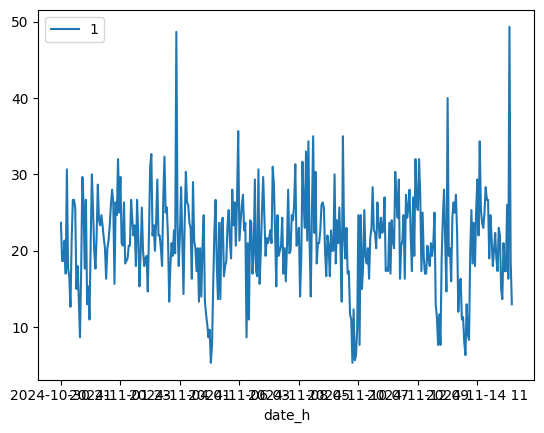

In [9]:
df_h.plot()

In [10]:
from sklearn import linear_model


In [11]:
reg = linear_model.LinearRegression()


In [12]:
import numpy as np


In [13]:
df_h_vals = df_h[1].values.reshape(-1, 1)
df_h_ct = np.array(range(len(df_h_vals))).reshape(-1, 1)


In [14]:
reg.fit(df_h_ct, df_h_vals)


LinearRegression()

In [15]:
import matplotlib.pyplot as plt


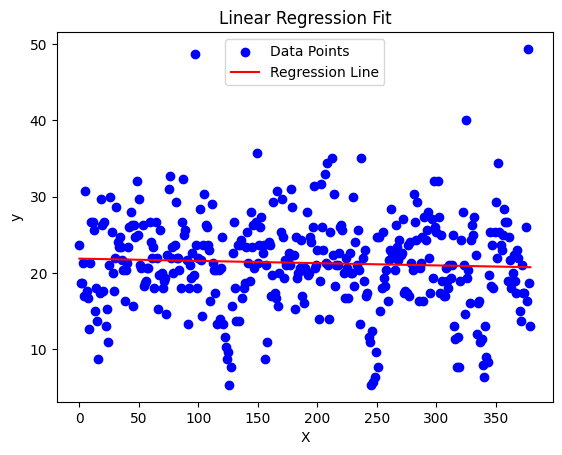

In [16]:
y_pred = reg.predict(df_h_ct)
plt.scatter(df_h_ct, df_h_vals, color='blue', label='Data Points')
plt.plot(df_h_ct, y_pred, color='red', label='Regression Line')

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression Fit")

plt.show()

In [17]:
y_pred

array([[21.87046553],
       [21.86750608],
       [21.86454663],
       [21.86158717],
       [21.85862772],
       [21.85566827],
       [21.85270881],
       [21.84974936],
       [21.84678991],
       [21.84383045],
       [21.840871  ],
       [21.83791155],
       [21.83495209],
       [21.83199264],
       [21.82903319],
       [21.82607373],
       [21.82311428],
       [21.82015483],
       [21.81719537],
       [21.81423592],
       [21.81127647],
       [21.80831701],
       [21.80535756],
       [21.80239811],
       [21.79943865],
       [21.7964792 ],
       [21.79351975],
       [21.79056029],
       [21.78760084],
       [21.78464139],
       [21.78168193],
       [21.77872248],
       [21.77576303],
       [21.77280357],
       [21.76984412],
       [21.76688467],
       [21.76392521],
       [21.76096576],
       [21.75800631],
       [21.75504685],
       [21.7520874 ],
       [21.74912795],
       [21.74616849],
       [21.74320904],
       [21.74024959],
       [21